# Lenses

## Tips

  * Python tutorials:
     * [A short introduction](https://realpython.com/python-first-steps/)
     * [A more complete introduction](https://www.w3schools.com/python/default.asp)
     * PythonMinimum
  * Use __esc r__ to disable a cell
  * Use __esc y__ to reactivate it
  * Use __esc m__ to go to markdown mode. **Markdown** is the typesetting language used in jupyter notebooks.
  * In a markdown cell, double tap the mouse or glide pad (on your laptop) to go to edit mode. 
  * Shift + return to execute a cell (including markdown cells).
  * If the equations don't typeset, try double tapping the cell again, and re-execute it.


## Introduction

In the rainbow project you were introduced to ray optics. In this exercise, we use the function `line_sphere_intersect` to compute the intersection of rays with a sphere, which is needed for project 4. 


In [3]:
import os, sys
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

%matplotlib inline

# update fonts
FONTSIZE = 12
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : FONTSIZE}
mp.rc('font', **font)

# use latex if available on system, otherwise set usetex=False
mp.rc('text', usetex=True)

### Import functions from CompPhysLab module `computil.vectors`

In [4]:
from computil.vectors import magnitude, norm, line_sphere_intersect

### Functions from `computil.vectors`

  1. `dot(a, b)`: dot product.
  1. `tangent(u, n)`: given incident unit vector `u` and normal unit vector `n` return the  unit vector `nt` tangent to `n` and that lies in the plane defined by `u` and `n`.
  1. `reflection(u, n)`: given incident unit vector `u` and normal unit vector `n` return the reflection unit vector `ur`.
  1. `transmission(u, n, n1, n2)`: given incident unit vector `u`, normal unit vector `n`, and refractive indices `n1` and `n2`, return the transmission unit vector `ut`.
  1. `line_sphere_intersect(c, u, a, o)`, return the intersection points of a line, specified by a point `c` and unit vector `u`, and a sphere of radius `a` centered at point `o`.

In [5]:
# plot one of more line segments from point c to point p
def draw_line_segments(Ax, C, P, Colors, Lstyle='solid'):
    try:
        for p1, p2, c in zip(C, P, Colors):
            x = [p1[0], p2[0]]
            y = [p1[1], p2[1]]
            Ax.plot(x, y, color=c, linestyle=Lstyle)
    except:
        x = [C[0], P[0]]
        y = [C[1], P[1]]
        Ax.plot(x, y, color=Colors, linestyle=Lstyle)

#### Check use of `line_sphere_intersect`

In [6]:
def trace_rays_thru_sphere(c, u, a, o, colors,
                          xmin=0.0, xmax=16.0,
                          ymin=0.0, ymax=8.0,
                         gfile='fig_rays_thru_sphere.png', 
              fgsize=(8, 4), 
              ftsize=18):

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=fgsize)
        
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel(r'$x$', fontsize=ftsize)
    ax.set_ylabel(r'$y$', fontsize=ftsize)
    ax.set_aspect(1)
    
    # draw circle representing sphere
    raindrop = plt.Circle(o, a, color='lightblue')
    ax.add_patch(raindrop)

    # draw ray(s)
    p = 20 * u + c
    draw_line_segments(ax, c, p, colors)
    p =-20 * u + c
    draw_line_segments(ax, c, p, colors)
    
    # compute intersection of rays with sphere
    p1, p2, crosses = line_sphere_intersect(c, u, a, o)

    # draw intersection points
    try:
        for i in range(len(crosses)):

            if crosses[i]:
                p = p1[i]
                x = [p[0]]
                y = [p[1]]
                ax.scatter(x, y, color='blue', s=50)

                p = p2[i]
                x = [p[0]]
                y = [p[1]]
                ax.scatter(x, y, color='green', s=25)
    except:
        if crosses:
            x = [p1[0]]
            y = [p1[1]]
            ax.scatter(x, y, color='blue', s=40)

            x = [p2[0]]
            y = [p2[1]]
            ax.scatter(x, y, color='green', s=25)

    plt.tight_layout()
    plt.savefig(gfile)
    plt.show()

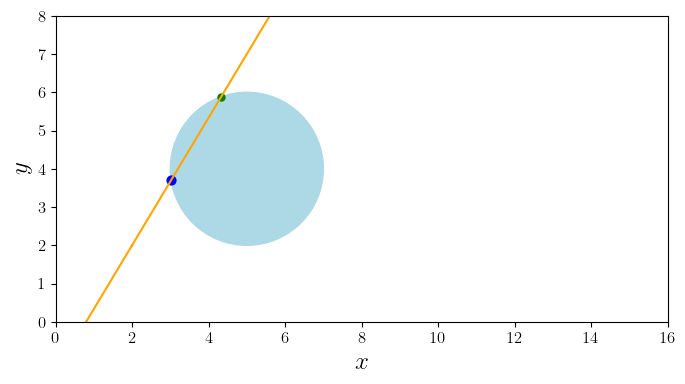

In [7]:
C = np.array([2, 2, 0])
U = norm(np.array([3, 5, 0]))
R = 2.0 # radius of sphere
O = np.array([5, 4, 0])
Colors = 'orange'

trace_rays_thru_sphere(C, U, R, O, Colors)

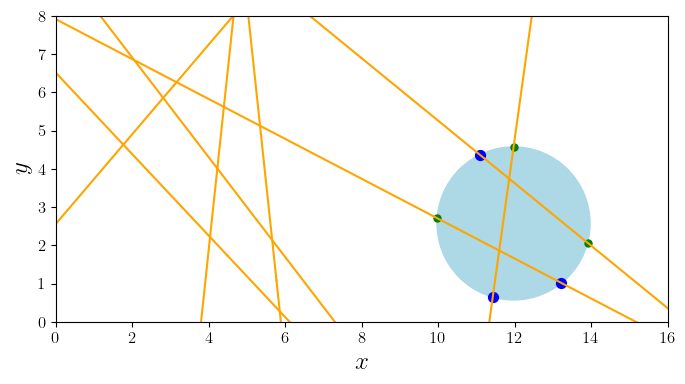

In [9]:
N = 8

C = [[np.random.uniform(2, 14), np.random.uniform(1, 7), 0] for _ in range(N)]
C = np.array(C)

U = [[np.random.uniform(-1, 1), np.random.uniform(-1, 1), 0] for _ in range(N)]
U = norm(np.array(U))

R = 2.0 # radius of sphere
O = np.array([np.random.uniform(2, 14), np.random.uniform(2, 6), 0])

Colors = ['orange'] * N

trace_rays_thru_sphere(C, U, R, O, Colors)